## Verifying number of Images loaded 

In [1]:
import os
stop_path = "stop_dataset/stop"
not_stop_path = "stop_dataset/not_stop"
stop_images = [f for f in os.listdir(stop_path) if f.lower().endswith(('png','jpg','jpeg'))]
not_stop_images = [f for f in os.listdir(not_stop_path) if f.lower().endswith(('png','jpg','jpeg'))]
print("Stop:", len(stop_images))
print("Not Stop:", len(not_stop_images))

Stop: 97
Not Stop: 100


## Visualizing the Images 

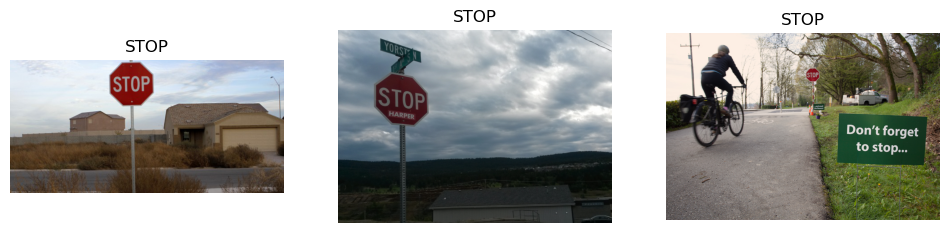

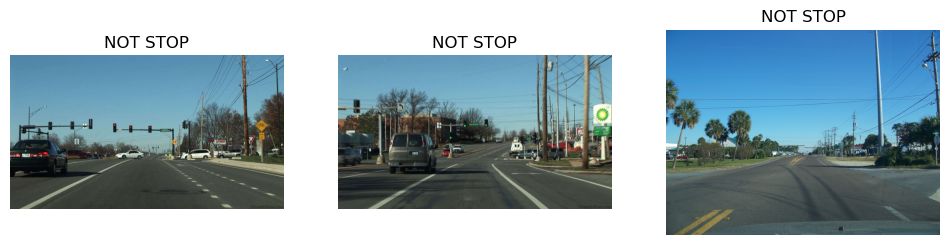

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
def show_imgs(img_list, folder, title):
    plt.figure(figsize=(12,6))
    for i, img_name in enumerate(img_list[:3]):
        plt.subplot(1,3,i+1)
        plt.imshow(Image.open(os.path.join(folder, img_name)))
        plt.axis("off")
        plt.title(title)
    plt.show()
show_imgs(stop_images, stop_path, "STOP")
show_imgs(not_stop_images, not_stop_path, "NOT STOP")

## Preparing dataset for model training

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_directory(
    'stop_dataset', 
    target_size=(64, 64), 
    batch_size=32, 
    class_mode='binary',
    subset='training'
)
val_gen = datagen.flow_from_directory(
    'stop_dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 158 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


## Building the CNN model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
model = Sequential([
    Input(shape=(64, 64, 3)),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

## Compiling the model

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Getting the summary of the model

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [7]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)

C:\Users\ttahz\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5000 - loss: 1.2007 - val_accuracy: 0.4872 - val_loss: 0.7425
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5000 - loss: 0.7403 - val_accuracy: 0.5128 - val_loss: 0.6899
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5063 - loss: 0.6910 - val_accuracy: 0.5128 - val_loss: 0.6873
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5570 - loss: 0.6875 - val_accuracy: 0.7179 - val_loss: 0.6833
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6646 - loss: 0.6705 - val_accuracy: 0.6154 - val_loss: 0.6624
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7089 - loss: 0.6389 - val_accuracy: 0.7436 - val_loss: 0.6249
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7089 - loss: 0.5976 - val_accuracy: 0.7692 - val_loss: 0.5589
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7595 - loss: 0.5256 - val_accuracy: 0.7179 - val_loss: 0.5660
Epoch 9/

## Plot Training and Validation Accuracy and Loss

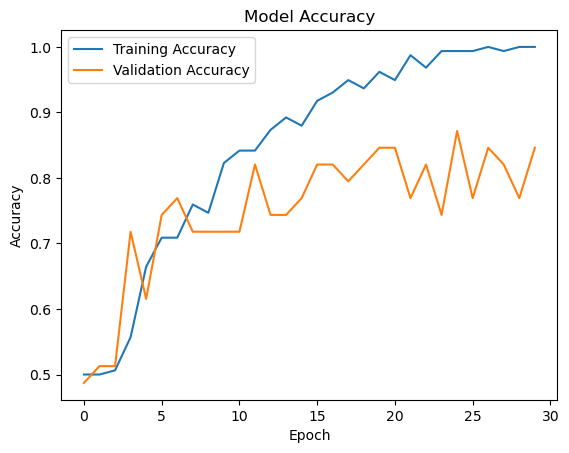

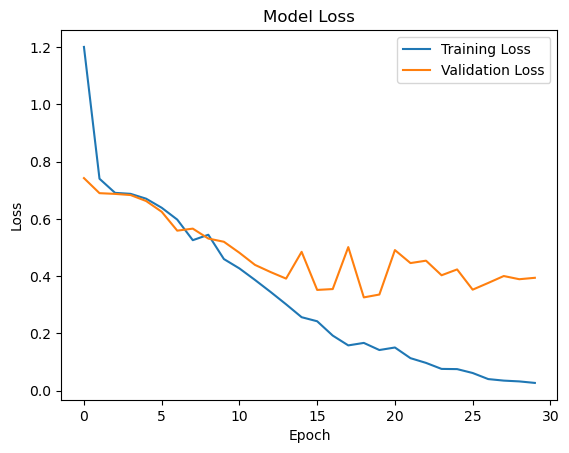

In [8]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Save the Trained Model


In [9]:
model.save('stop_sign_classifier.keras')

## Testing the model on the dataset images

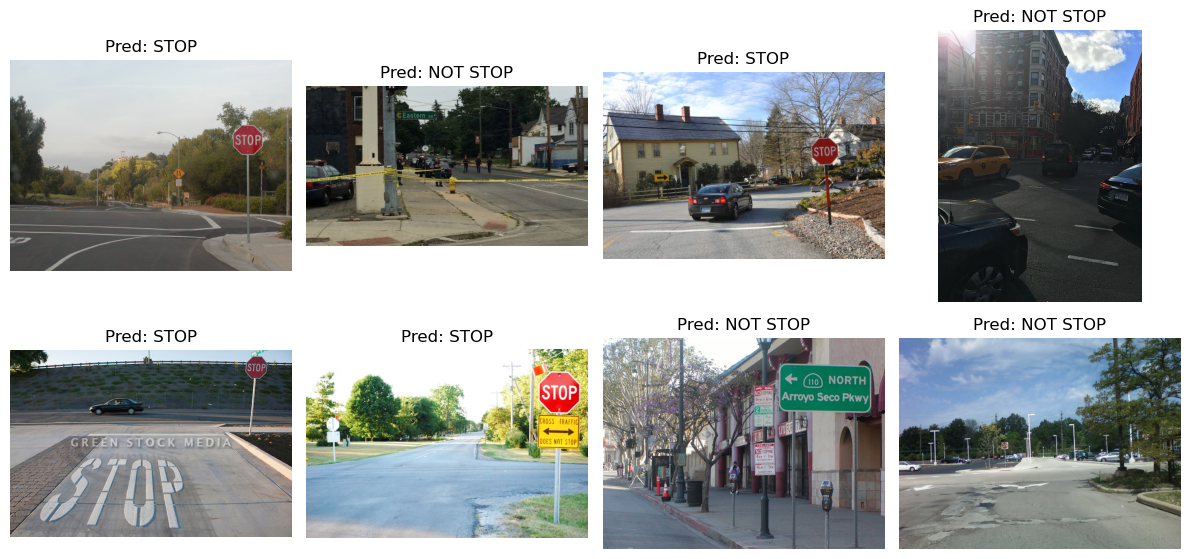

In [13]:
import os, random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

folders = ['stop_dataset/stop', 'stop_dataset/not_stop']
all_images = [os.path.join(f, img) for f in folders for img in os.listdir(f)]
sample_images = random.sample(all_images, 8)

plt.figure(figsize=(12,6))
for i, img_path in enumerate(sample_images):
    img = image.load_img(img_path, target_size=(64,64))
    img_array = image.img_to_array(img) / 255.0
    pred = model.predict(np.expand_dims(img_array, axis=0), verbose=0)[0][0]
    label = "STOP" if pred >= 0.5 else "NOT STOP"

    plt.subplot(2,4,i+1)
    plt.imshow(image.load_img(img_path))
    plt.title(f"Pred: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Testing of the image outside of the dataset

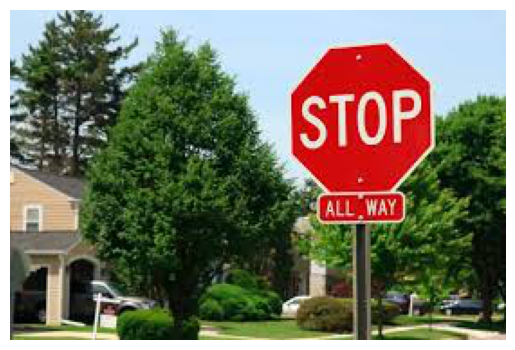

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction: STOP (99.99% confidence)


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = "image.jpeg"

original_img = image.load_img(img_path)
plt.imshow(original_img)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)
img_array_normalized = img_array_expanded / 255.0

prediction = model.predict(img_array_normalized)

if prediction[0][0] > 0.5:
    print(f"Prediction: STOP ({prediction[0][0]*100:.2f}% confidence)")
else:
    print(f"Prediction: NOT STOP ({(1-prediction[0][0])*100:.2f}% confidence)")

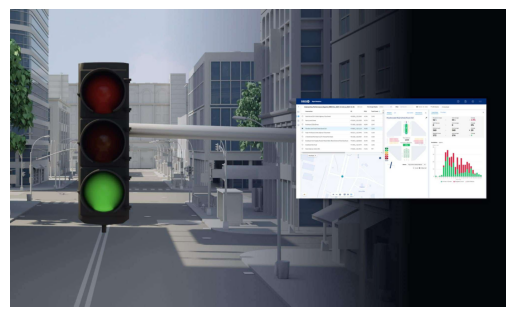

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: NOT STOP (93.98% confidence)


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = "image2.jpeg"

original_img = image.load_img(img_path)
plt.imshow(original_img)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)
img_array_normalized = img_array_expanded / 255.0

prediction = model.predict(img_array_normalized)

if prediction[0][0] > 0.5:
    print(f"Prediction: STOP ({prediction[0][0]*100:.2f}% confidence)")
else:
    print(f"Prediction: NOT STOP ({(1-prediction[0][0])*100:.2f}% confidence)")